In [3]:
import pandas as pd

# Cargar el archivo CSV
file_path = "dataset_comp_ratio.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas para revisar el contenido
df.head()

df.drop(columns=["LONGITUD_NUM"], inplace=True, errors='ignore')
df.drop(columns=["LATITUD_NUM"], inplace=True, errors='ignore')
df.drop(columns=["PLAZA_CVE"], inplace=True, errors='ignore')
df.drop(columns=["META_VENTA"], inplace=True, errors='ignore')



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Variables
y = df['RATIO_CUMPLIMIENTO']
X = df.drop(columns=['VENTA_TOTAL', 'TIENDA_ID', 'LATITUD_NUM_x', 'LONGITUD_NUM_x',
                     'LATITUD_NUM_y', 'LONGITUD_NUM_y', 'RATIO_CUMPLIMIENTO'], errors='ignore')

# Identificar tipos
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocesamiento
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

# Modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


# Filtrar datos para eliminar valores nulos en la variable objetivo
df_filtrado = df[df['RATIO_CUMPLIMIENTO'].notna()].copy()

# Redefinir X e y
y = df_filtrado['RATIO_CUMPLIMIENTO']
X = df_filtrado.drop(columns=['VENTA_TOTAL', 'TIENDA_ID', 'LATITUD_NUM_x', 'LONGITUD_NUM_x',
                              'LATITUD_NUM_y', 'LONGITUD_NUM_y', 'RATIO_CUMPLIMIENTO'], errors='ignore')

# Entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['dist_comp_directa',
                                                   'num_comp_directa',
                                                   'dist_comp_indirecta',
                                                   'num_comp_indirecta',
                                                   'MTS2VENTAS_NUM',
                                                   'PUERTASREFRIG_NUM']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['NIVELSOCIOECONOMICO_DES',
                                                   'ENTORNO_DES',
                                                   'SEGMENTO_MAESTRO_DESC',
                                                   'LID_UBICACION_TIENDA',
                                                   'DATASET'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

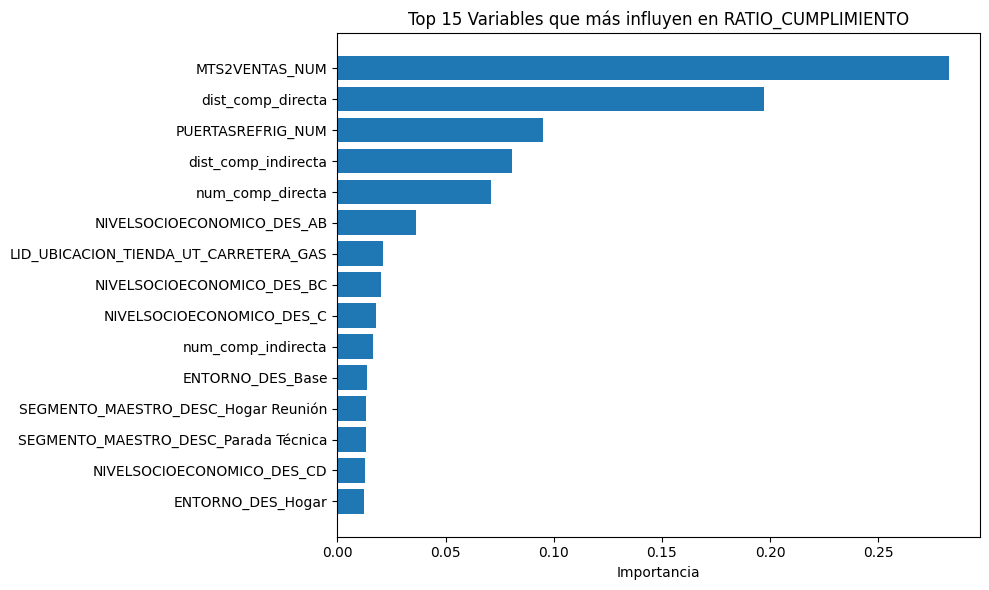

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Obtener el modelo entrenado
rf = model.named_steps['regressor']

# Obtener nombres de variables transformadas
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_cols)
feature_names = num_cols + list(cat_feature_names)

# Obtener importancias
importances = rf.feature_importances_
importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False).head(15)

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(importances_df['feature'], importances_df['importance'])
plt.xlabel("Importancia")
plt.title("Top 15 Variables que más influyen en RATIO_CUMPLIMIENTO")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


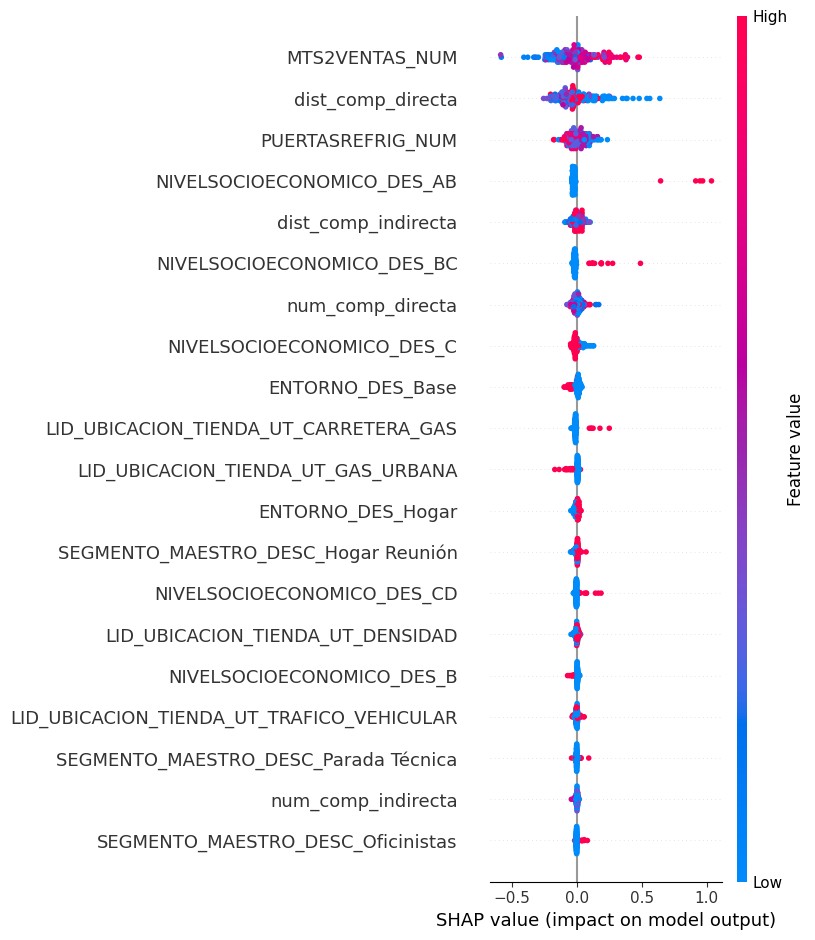

In [6]:
import shap

# Usar el modelo sin el pipeline para SHAP (solo Random Forest y datos transformados)
X_transformed = model.named_steps['preprocessor'].transform(X_test)
explainer = shap.TreeExplainer(model.named_steps['regressor'])
shap_values = explainer.shap_values(X_transformed)

# Obtener nombres de las features transformadas
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_cols)
feature_names = num_cols + list(cat_feature_names)

# Crear un summary plot
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)


### HOGAR


In [7]:
# Filtrar solo las filas donde ENTORNO_DES_x es 'Base'
df_hogar = df[df['ENTORNO_DES'] == 'Hogar'].copy()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Variables
y = df_hogar['RATIO_CUMPLIMIENTO']
X = df_hogar.drop(columns=['VENTA_TOTAL', 'TIENDA_ID', 'LATITUD_NUM_x', 'LONGITUD_NUM_x',
                     'LATITUD_NUM_y', 'LONGITUD_NUM_y', 'RATIO_CUMPLIMIENTO'], errors='ignore')

# Identificar tipos
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocesamiento
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

# Modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


# Filtrar datos para eliminar valores nulos en la variable objetivo
df_filtradoh = df_hogar[df_hogar['RATIO_CUMPLIMIENTO'].notna()].copy()

# Redefinir X e y
y = df_filtradoh['RATIO_CUMPLIMIENTO']
X = df_filtradoh.drop(columns=['VENTA_TOTAL', 'TIENDA_ID', 'LATITUD_NUM_x', 'LONGITUD_NUM_x',
                              'LATITUD_NUM_y', 'LONGITUD_NUM_y', 'RATIO_CUMPLIMIENTO'], errors='ignore')

# Entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['dist_comp_directa',
                                                   'num_comp_directa',
                                                   'dist_comp_indirecta',
                                                   'num_comp_indirecta',
                                                   'MTS2VENTAS_NUM',
                                                   'PUERTASREFRIG_NUM']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['NIVELSOCIOECONOMICO_DES',
                                                   'ENTORNO_DES',
                                                   'SEGMENTO_MAESTRO_DESC',
                                                   'LID_UBICACION_TIENDA',
                                                   'DATASET'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

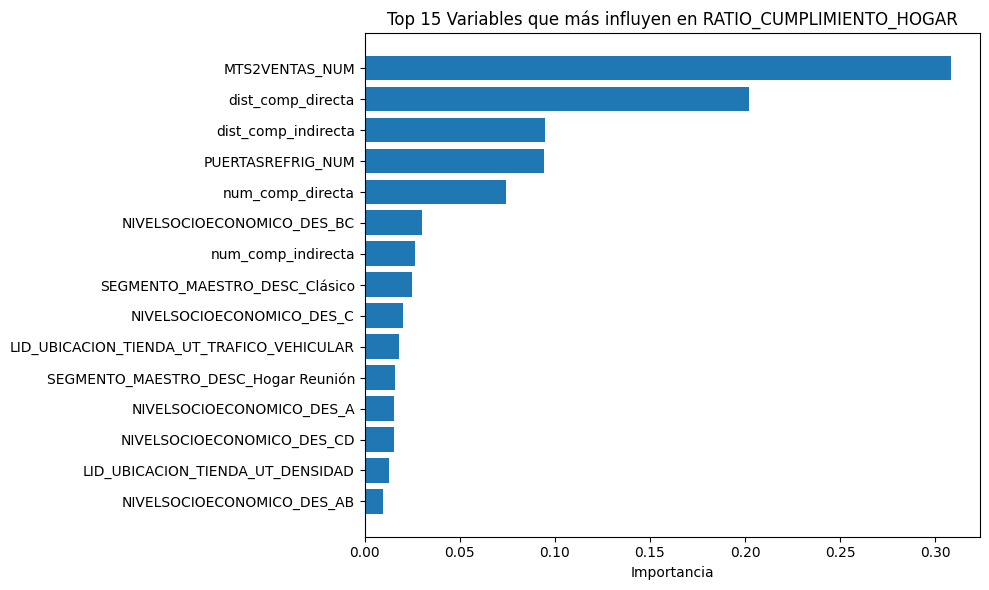

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Obtener el modelo entrenado
rf = model.named_steps['regressor']

# Obtener nombres de variables transformadas
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_cols)
feature_names = num_cols + list(cat_feature_names)

# Obtener importancias
importances = rf.feature_importances_
importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False).head(15)

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(importances_df['feature'], importances_df['importance'])
plt.xlabel("Importancia")
plt.title("Top 15 Variables que más influyen en RATIO_CUMPLIMIENTO_HOGAR")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### RECESO

In [ ]:
# Filtrar solo las filas donde ENTORNO_DES_x es 'Base'
df_Receso = df[df['ENTORNO_DES'] == 'Receso'].copy()